In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [32]:
Filename="Student_performance_data .csv" #importing .csv file using pandas
df=pd.read_csv(Filename)

In [33]:
x = df.drop(['GradeClass','StudentID'], axis=1)
y=df["GradeClass"]

In [34]:
#_ = sns.pairplot(data = df, hue=y,corner = True)

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

model = LogisticRegression(random_state = 0, solver='lbfgs',max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

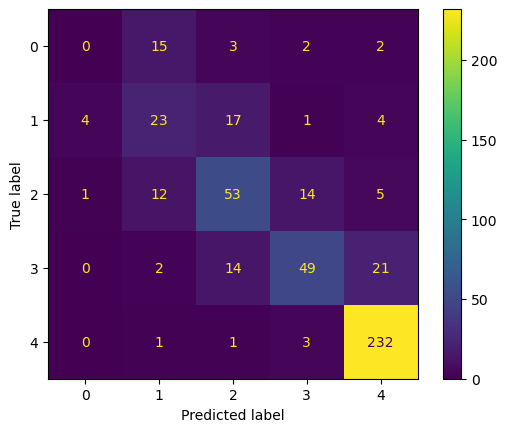

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


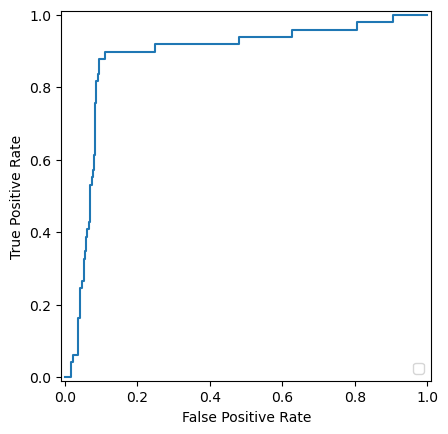

In [38]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# You need probabilities for this
y_probs = model.predict_proba(X_test)[:, 1]  # for binary classification
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=model.classes_[1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

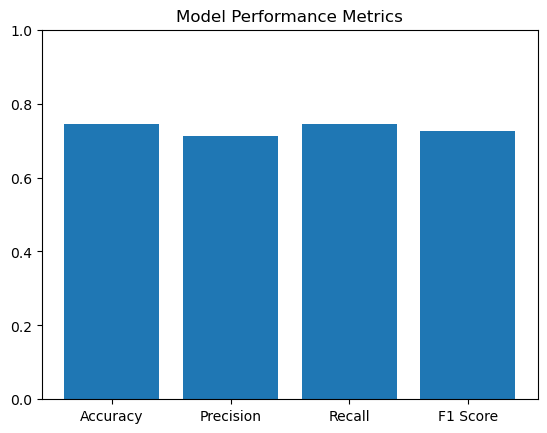

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_test_pred, average='weighted')
}

plt.bar(metrics.keys(), metrics.values())
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.show()